# Columns

+ id: A unique identifier for each student
+ Marital status: Marital status of the student (1 = single, 2 = married, 3 = widower, 4 = divorced, 5 = facto union, 6 = legally separated).
+ Application mode: Application mode for the student
+ Application order: Order of the application.
+ Course: Course enrolled by the student.
+ Daytime evening attendance: Whether the student attends daytime or evening classes. (1 = daytime, 0 = evening)
+ Previous qualification: Previous qualification of the student.
+ Previous qualification (grade): Previous qualification grade of the student.
+ Nacionality: Nationality of the student.
+ Mother qualification: Qualification of the student's mother.
+ Father qualification: Qualification of the student's father.
+ Mother_occupation: Occupation of the student's mother
+ Father_occupation: Occupation of the student's father
+ Displaced: Whether the student is displaced. (1 = yes, 0 = no)
+ Educational_special_needs: Whether the student has educational special needs. (1 = yes, 0 = no)
+ Debtor: Whether the student is a debtor. (1 = yes, 0 = no)
+ Tuition_fees_up_to_date: Whether the student's tuition fees are up to date. (1 = yes, 0 = no)
+ Gender: Gender of the student (0 = female, 1 = male)
+ Scholarship_holder: Whether the student is a scholarship holder. (1 = yes, 0 = no)
+ Age_at_enrollment: Age of the student at enrollment.
+ International: Whether the student is international. (1 = yes, 0 = no)
+ Curricular units 1st sem (credited): Number of curricular units credited in the first semester.
+ Curricular_units_1st_sem_enrolled: Number of curricular units enrolled in the first semester.
+ Curricular_units_1st_sem_evaluations: Number of evaluations in the first semester.
+ Curricular_units_1st_sem_approved: Number of approved units in the first semester.
+ Curricular_units_1st_sem_grade: Grade in the first semester.
+ Curricular units 1st sem (without evaluations): Number of curricular units in the first semester without evaluations.
+ Curricular units 2nd sem (credited): Number of curricular units credited in the second semester.
+ Curricular_units_2nd_sem_enrolled: Number of curricular units enrolled in the second semester.
+ Curricular_units_2nd_sem_evaluations: Number of evaluations in the second semester.
+ Curricular_units_2nd_sem_approved: Number of approved units in the second semester.
+ Curricular_units_2nd_sem_grade: Grade in the second semester.
+ Curricular units 2nd sem (without evaluations): Number of curricular units in the second semester without evaluations.
+ Unemployment_rate: Unemployment rate.
+ Inflation_rate: Inflation rate.
+ GDP: Gross Domestic Product.
+ Target: The target variable indicating the student's outcome (Graduate, Dropout, Enrolled).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt


In [4]:
def readJson(filepath: str) -> dict:
    with open('config.json', 'r') as file:
        return json.load(file)


def readCsv(filepath: str) -> pd.DataFrame:
    try:
        return pd.read_csv(filepath)
    except Exception as e:
        print(e)
        return pd.DataFrame()


In [20]:
def display_basic_info(df: pd.DataFrame) -> None :
    print("Basic Information:")
    print("------------------")
    df.info()
    print("\nFirst 5 rows of the dataset:")
    display(df.head())
    print("\nSummary Statistics for Numerical Features:")
    display(df.describe())
    print("\nSummary Statistics for Categorical Features:")
    display(df.describe(include=['O']))

def heatMapCorrelation(df: pd.DataFrame) -> plt.axes :
    plt.figure(figsize = (15,7))
    corr= df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    return sns.heatmap(corr, mask = mask, fmt = '0.2g', cmap = 'Blues', linewidths = 1)


def showFrequencyTarget(df: pd.DataFrame) -> plt.axes :
    plt.figure(figsize=(10, 10))
    palette_color = sns.color_palette('pastel')
    explode = [0.1 for _ in range(df['Target'].nunique())]

    plt.title('Target Distribution', fontsize=18, weight='bold')

    plt.axis('equal')

    return df.groupby('Target')['Target'].count().plot.pie(
        colors=palette_color,
        explode=explode,
        autopct="%1.1f%%",
        shadow=True,  
        startangle=140,  
        textprops={'fontsize': 14},  
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  
    )

def makeSubplots(df: pd.DataFrame) -> plt.axes :
    colors = ['#ff00e6', '#030303', '#f2d5a5']
    sns.set_theme(style="whitegrid")
    fig = plt.figure(figsize=(15, 60))
    i = 1
    for label in df.drop('Target', axis=1).columns:
        plt.subplot(13, 3, i) 
        for idx, target in enumerate(df['Target'].unique()):
            sns.histplot(df[df['Target'] == target][label], color=colors[idx], label=target, alpha=0.5, kde=True)
        plt.title(label, fontsize=16, color='#FF4500', fontweight='bold') 
        plt.xlabel(label, fontsize=12, color='#FF6347')  
        plt.ylabel('Probability', fontsize=12, color='#FF6347')  
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', linewidth=0.5, color='#FF4500', alpha=0.7) 
        plt.xticks(fontsize=10, color='#FF4500')  
        plt.yticks(fontsize=10, color='#FF4500') 
        plt.gca().spines['top'].set_visible(False)  
        plt.gca().spines['right'].set_visible(False)  
        plt.gca().spines['left'].set_color('#FF4500')  
        plt.gca().spines['bottom'].set_color('#FF4500')  
        i += 1

    plt.tight_layout()

def plot_boxplots(df: pd.DataFrame) -> None:
    
    num_cols = len(df.columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 5 * num_cols))

    if num_cols == 1:
        axes = [axes]

    # Crear un boxplot para cada columna
    for ax, col in zip(axes, df.columns):
        sns.boxplot(data=df, x=col, ax=ax)
        ax.set_title(f'Boxplot of {col}')
        ax.set_xlabel('')
        ax.set_ylabel(col)

    plt.tight_layout()
    plt.show()




    



In [6]:
## Extraemos la ruta y generamos el dataframe
config = readJson('config.json')
dfTrain = readCsv(config['files']['train'])


In [7]:
## Generamos las principales caracteristicas del dataframe
display_basic_info(dfTrain)

Basic Information:
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   M

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate



Summary Statistics for Numerical Features:


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000



Summary Statistics for Categorical Features:


,Target
count,76518
unique,3
top,Graduate
freq,36282


In [8]:
# Sacamos la columna resultado (si se graduó o no)
df = dfTrain.iloc[:, :-1]

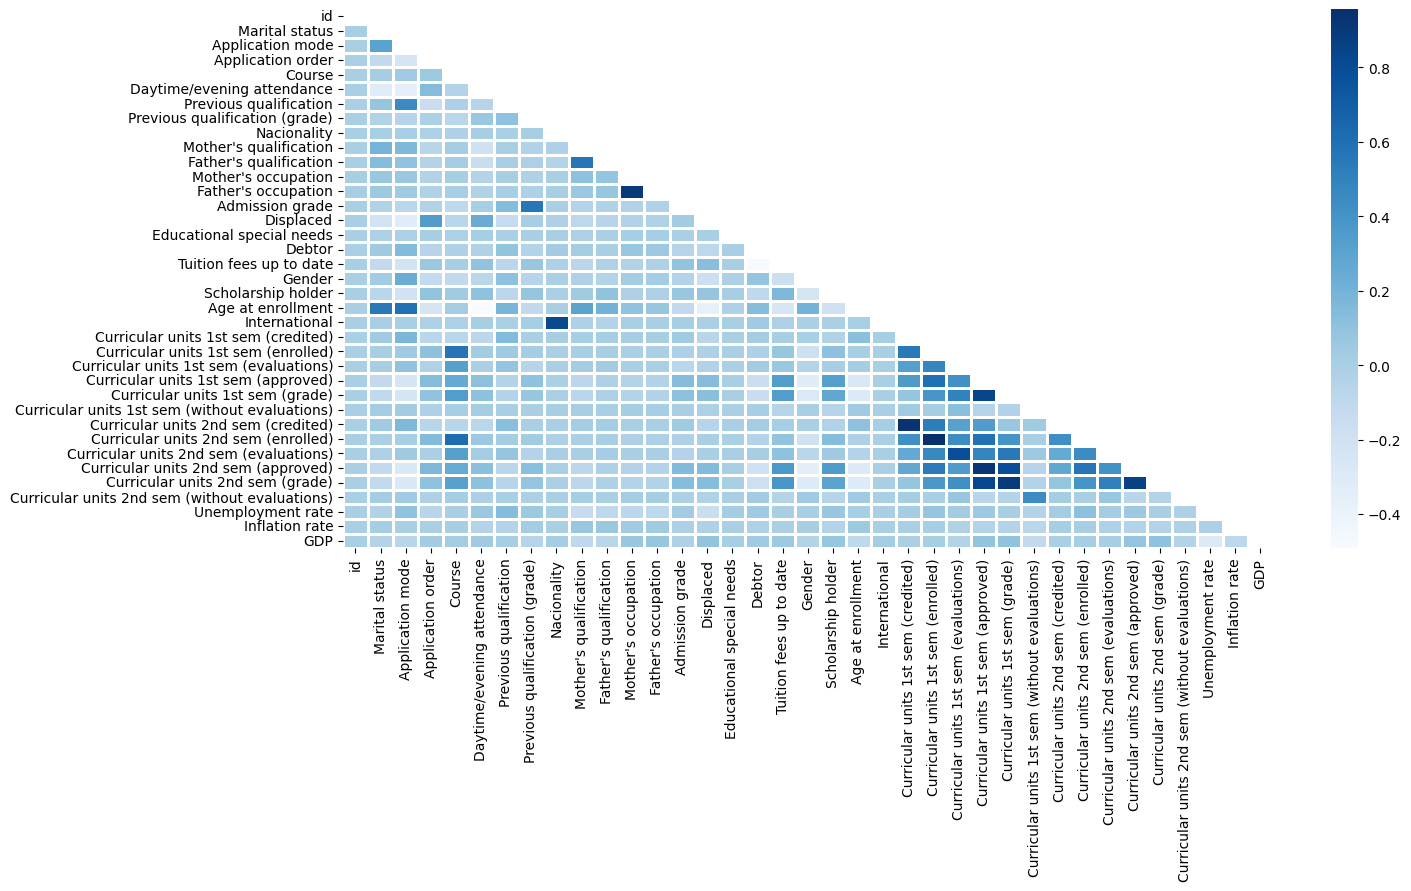

In [9]:
# Heatmap de correlacion entre las columnas
hm = heatMapCorrelation(df)
plt.show()


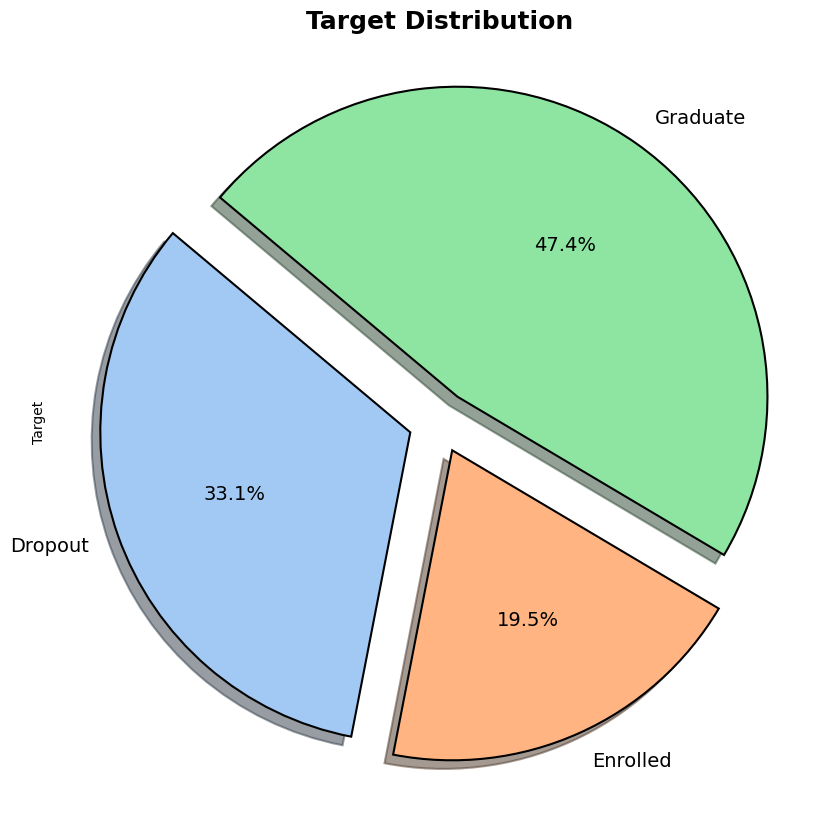

In [10]:
freq = showFrequencyTarget(dfTrain)
plt.show()

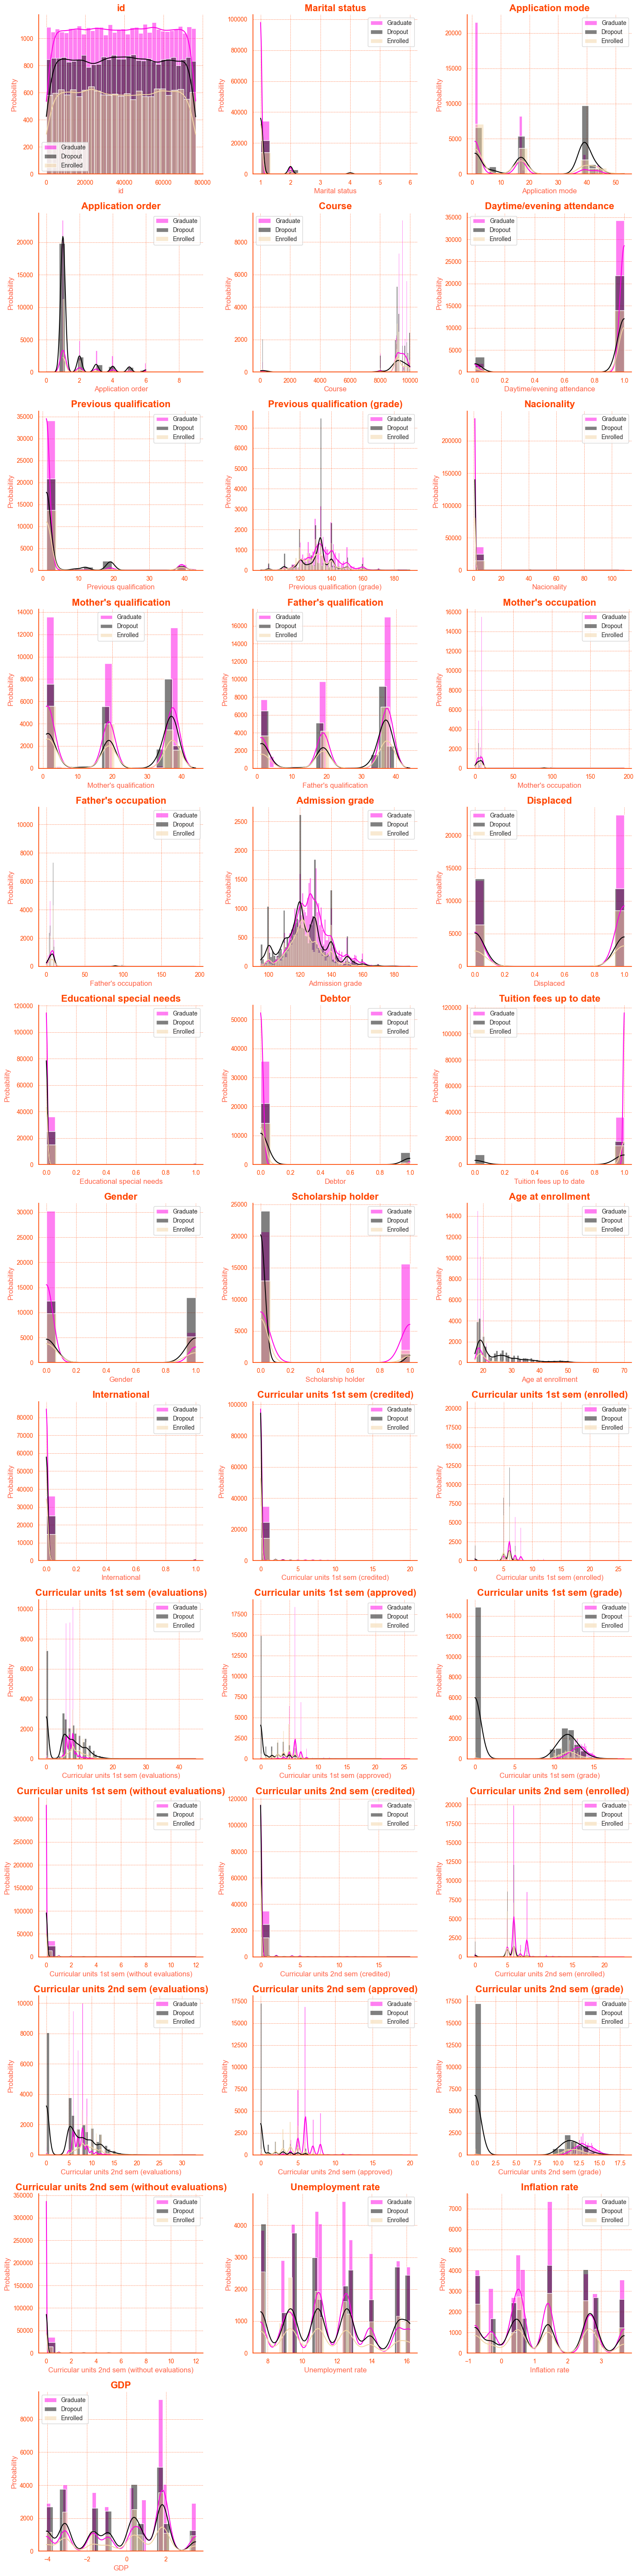

In [12]:
sb = makeSubplots(dfTrain)
plt.show()

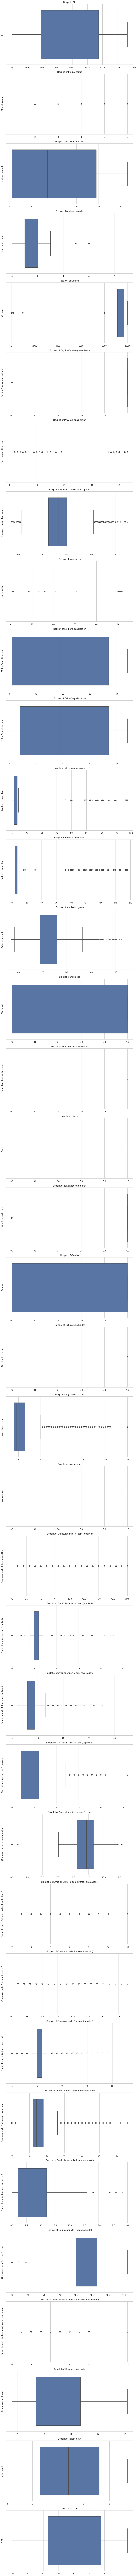

In [19]:
plot_boxplots(df)